# **The following code may be used a Monte Carlo simulation to forecast the stock price of a chosen stock**

The formula used for forecasting: 

Today's price = yesterday's price * e^r

Brownian motion will be used to model r.

r = drift + (standard_deviation * Z)

In [ ]:
#Step 1 - import libraries to use throughout the process
import numpy as np
import pandas as pd
from pandas_datareader import data as source
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
#Step 2 - collect real time data for the adjusted close stock price of the stock you would like to forecast
stock = 'MSFT'
stock_data = pd.DataFrame()
stock_data[stock] = source.DataReader(stock, data_source = 'yahoo', start = '2010-1-1')['Adj Close']
stock_data

,MSFT
Date,
2010-01-04,24.226894
2010-01-05,24.234720
2010-01-06,24.085989
2010-01-07,23.835503
2010-01-08,23.999893
...,...
2020-07-17,202.880005
2020-07-20,211.600006
2020-07-21,208.750000


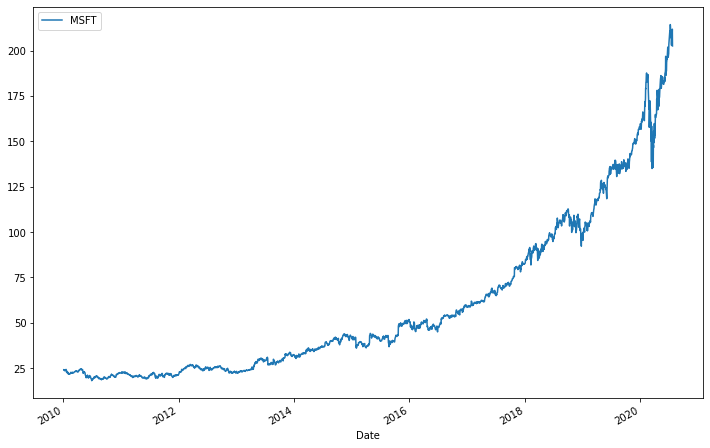

In [ ]:
#CHECK - visualise the stock's price over the period specified
stock_data.plot(figsize = (12,8))

In [ ]:
#Step 3 - estimate the stock's historical log returns
log_retns = np.log(1 + stock_data.pct_change())
log_retns

,MSFT
Date,
2010-01-04,NaN
2010-01-05,0.000323
2010-01-06,-0.006156
2010-01-07,-0.010454
2010-01-08,0.006873
...,...
2020-07-17,-0.005113
2020-07-20,0.042083
2020-07-21,-0.013560


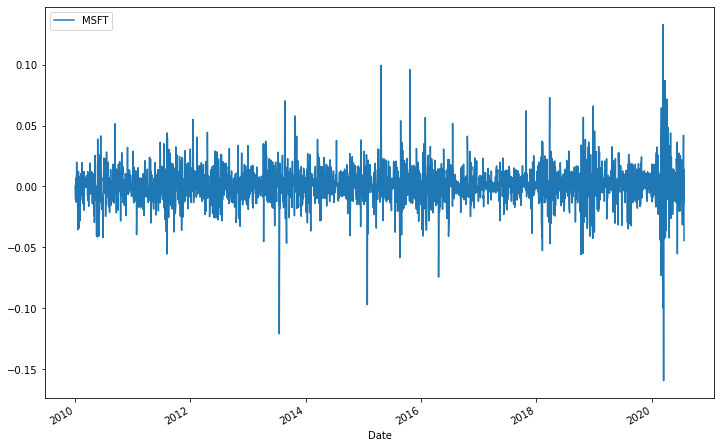

In [ ]:
#CHECK - visualise the stock's log returns
log_retns.plot(figsize = (12,8))

In [ ]:
# Step 4 - obtain the average log return value
avg_lr = log_retns.mean()
avg_lr


MSFT    0.0008
dtype: float64

In [ ]:
# Step 5 - obtain the variance of the log returns
var_lr = log_retns.var()
var_lr

MSFT    0.000252
dtype: float64

In [ ]:
# Step 6 - use the average and variance of the log return value to calculate the drift, convert the value into an array.
drift = (avg_lr - (var_lr/2)).values
drift

array([0.00067362])

In [ ]:
#Step 7 - calculate the standard deviation of the log returns of the stock, convert the value into an array.
stdev_lr = (log_retns.std()).values
stdev_lr

array([0.01586685])

In [ ]:
#Step 8 - create variables to represent the number of intervals and iterations in the simulation
  #The number of intervals will be the number of days the stock price is predicted for.
  #The number of iterations will be the number of seperate iterations of the stock price generated by the simulation."""
intervals = 10000
iterations = 100


In [ ]:
#Step 9 - create a variable to represent the distance between the mean and the events, using the standardised normal distribution.
Z = norm.ppf(np.random.rand(intervals, iterations))
Z

array([[-0.56067948,  0.23788539, -0.81776917, ..., -0.43508412,
        -0.59028713,  0.06249936],
       [-0.37240083, -0.50525369,  1.51285356, ...,  2.07968494,
        -1.74136916,  1.45985558],
       [ 0.32597462,  0.16175592, -0.19572547, ...,  0.80778382,
        -0.09641101, -0.93681901],
       ...,
       [ 0.4300655 , -0.47206621,  0.43926694, ..., -1.14750028,
         0.14837005,  1.1199478 ],
       [ 0.78915832, -1.66170986, -2.41968643, ...,  0.0882904 ,
         0.90359576, -0.64821009],
       [-1.32726106,  1.58649001,  0.2153117 , ...,  0.18089145,
        -0.72089724, -0.23659073]])

In [ ]:
#Step 10 - calculate the daily returns, using the numpy exponential method.
daily_return = np.exp(drift + stdev_lr* Z)
daily_return

array([[0.99181112, 1.00445802, 0.98777356, ..., 0.99378957, 0.99134529,
        1.00166668],
       [0.99477847, 0.99268373, 1.02498487, ..., 1.03424499, 0.97340365,
        1.02412331],
       [1.00586293, 1.00324543, 0.99757103, ..., 1.01358202, 0.99914425,
        0.98590947],
       ...,
       [1.00752558, 0.9932066 , 1.00767269, ..., 0.98261922, 1.00303238,
        1.0186148 ],
       [1.01328252, 0.97463476, 0.96298332, ..., 1.00207667, 1.01512407,
        0.99043461],
       [0.97982055, 1.02618314, 1.00409832, ..., 1.00355009, 0.98929298,
        0.99692441]])

In [ ]:
# Step 11 - create a variable to hold the current market price.
current_price = stock_data.iloc[-1]
current_price

MSFT    202.539993
Name: 2020-07-23 00:00:00, dtype: float64

In [ ]:
#Step 12 - create an empty array, which will store the future stock prices.
price_list = np.zeros_like(daily_return)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Step 13 - set the first row of the price list to the current price of the stock.
  #This will be the initial value for all of the 100 iterations generated."""
price_list[0] = current_price
price_list

array([[202.53999329, 202.53999329, 202.53999329, ..., 202.53999329,
        202.53999329, 202.53999329],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [ ]:
#Step 14 - use a loop to populate the price list
for t in range(1,intervals):
  price_list[t] = price_list[t-1] * daily_return[t]
np.set_printoptions(precision = 4, suppress = True)

price_list

array([[   202.54  ,    202.54  ,    202.54  , ...,    202.54  ,
           202.54  ,    202.54  ],
       [   201.4824,    201.0582,    207.6004, ...,    209.476 ,
           197.1532,    207.4259],
       [   202.6637,    201.7107,    207.0962, ...,    212.3211,
           196.9845,    204.5032],
       ...,
       [627053.9483, 155917.0774, 541049.7504, ...,  20136.847 ,
        969920.269 , 261436.0843],
       [635382.8055, 151962.2031, 521021.885 , ...,  20178.6645,
        984589.4133, 258935.3462],
       [622561.1311, 155941.0503, 523157.1977, ...,  20250.3005,
        974047.3986, 258138.9675]])

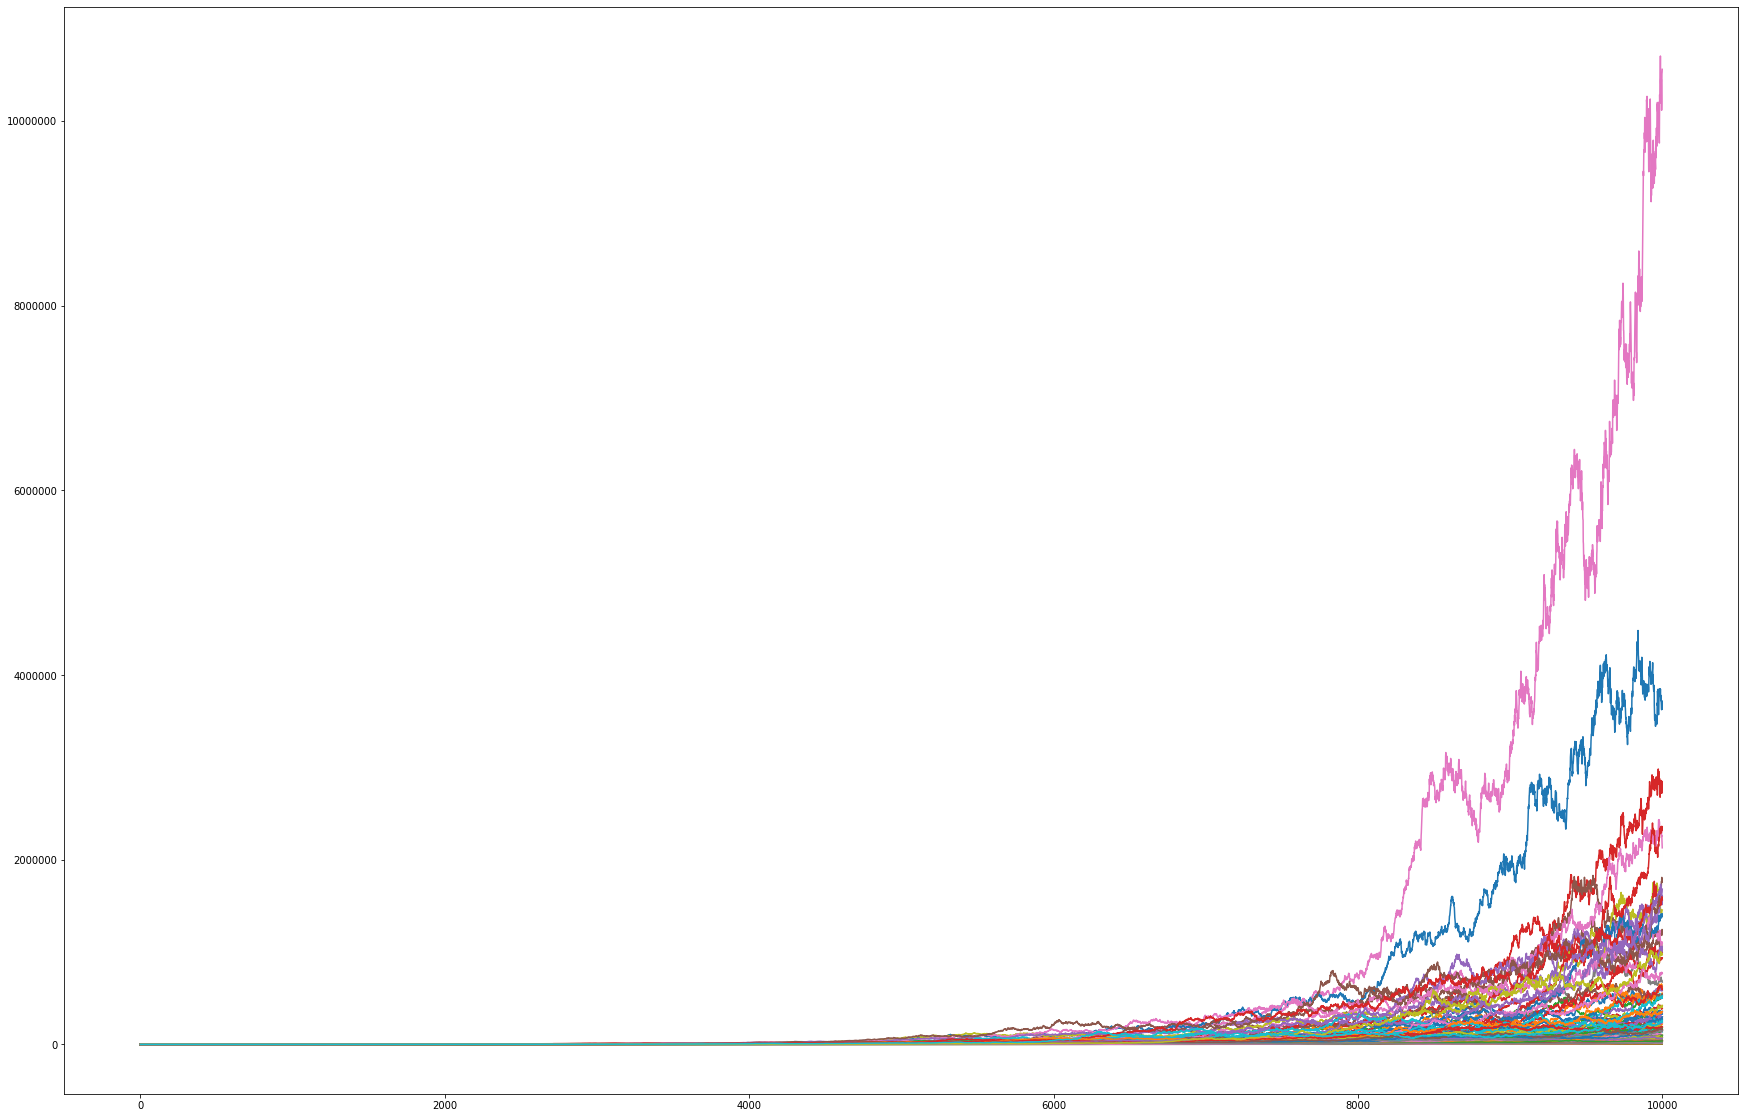

In [ ]:
#Step 15 - visualise the simulation results
plt.figure(figsize = (30,20))
plt.plot(price_list)
plt.ticklabel_format(style = 'plain', axis = 'y')

This displays 100 possible paths of the expected stock price for the company of choice, starting from the final day for which data was collected from Yahoo. 